In [1]:
import pandas as pd
import numpy as np

In [2]:
ages = [20, 22, 25, 27, 21, 24, 37, 31, 61, 45, 41, 32]
bins = [18, 25, 35, 60, 100]
cats = pd.cut(ages, bins)
cats

[(18, 25], (18, 25], (18, 25], (25, 35], (18, 25], ..., (25, 35], (60, 100], (35, 60], (35, 60], (25, 35]]
Length: 12
Categories (4, object): [(18, 25] < (25, 35] < (35, 60] < (60, 100]]

In [4]:
cats.codes

array([0, 0, 0, 1, 0, 0, 2, 1, 3, 2, 2, 1], dtype=int8)

In [5]:
cats.categories

Index([u'(18, 25]', u'(25, 35]', u'(35, 60]', u'(60, 100]'], dtype='object')

In [6]:
pd.value_counts(cats)

(18, 25]     5
(35, 60]     3
(25, 35]     3
(60, 100]    1
dtype: int64

In [7]:
pd.cut(ages, [18, 26, 36, 61, 100], right = False)

[[18, 26), [18, 26), [18, 26), [26, 36), [18, 26), ..., [26, 36), [61, 100), [36, 61), [36, 61), [26, 36)]
Length: 12
Categories (4, object): [[18, 26) < [26, 36) < [36, 61) < [61, 100)]

In [8]:
# 라벨 붙여서 범위를 대체하기
group_names = ['youth', 'youthadult', 'middleaged', 'senior']
pd.cut(ages, bins, labels = group_names)

[youth, youth, youth, youthadult, youth, ..., youthadult, senior, middleaged, middleaged, youthadult]
Length: 12
Categories (4, object): [youth < youthadult < middleaged < senior]

In [9]:
# 소수점 아래 2개의 숫자 표시(두자리까지 표시가 아님)
data = np.random.rand(20)
pd.cut(data, 4, precision = 2)

[(0.73, 0.97], (0.49, 0.73], (0.73, 0.97], (0.49, 0.73], (0.0098, 0.25], ..., (0.73, 0.97], (0.25, 0.49], (0.25, 0.49], (0.0098, 0.25], (0.25, 0.49]]
Length: 20
Categories (4, object): [(0.0098, 0.25] < (0.25, 0.49] < (0.49, 0.73] < (0.73, 0.97]]

# qcut

In [21]:
data1 = np.random.randn(1000)
cats1 = pd.qcut(data1, 4)
cats1

[[-3.537, -0.635], [-3.537, -0.635], (-0.0277, 0.673], [-3.537, -0.635], (-0.0277, 0.673], ..., (-0.0277, 0.673], (-0.0277, 0.673], [-3.537, -0.635], (-0.635, -0.0277], (-0.0277, 0.673]]
Length: 1000
Categories (4, object): [[-3.537, -0.635] < (-0.635, -0.0277] < (-0.0277, 0.673] < (0.673, 3.364]]

In [22]:
pd.value_counts(cats1)

(0.673, 3.364]       250
(-0.0277, 0.673]     250
(-0.635, -0.0277]    250
[-3.537, -0.635]     250
dtype: int64

In [23]:
# qcut(data1, 4)와 동일
pd.qcut(data1, [0, .25, .5, .75, 1])

[[-3.537, -0.635], [-3.537, -0.635], (-0.0277, 0.673], [-3.537, -0.635], (-0.0277, 0.673], ..., (-0.0277, 0.673], (-0.0277, 0.673], [-3.537, -0.635], (-0.635, -0.0277], (-0.0277, 0.673]]
Length: 1000
Categories (4, object): [[-3.537, -0.635] < (-0.635, -0.0277] < (-0.0277, 0.673] < (0.673, 3.364]]

In [19]:
pd.qcut(data1, [0, 0.1, 0.5, 0.9, 1])

[(-0.00944, 1.371], (1.371, 2.911], (-0.00944, 1.371], (-0.00944, 1.371], (-1.249, -0.00944], ..., (-1.249, -0.00944], (-0.00944, 1.371], (-1.249, -0.00944], (-1.249, -0.00944], (-0.00944, 1.371]]
Length: 1000
Categories (4, object): [[-3.137, -1.249] < (-1.249, -0.00944] < (-0.00944, 1.371] < (1.371, 2.911]]

# pima

In [24]:
pima = pd.read_csv('pima.csv', index_col = 0)
pima.describe()

,npreg,glu,bp,skin,bmi,ped,age
count,332.000000,332.000000,332.000000,332.000000,332.000000,332.000000,332.000000
mean,3.484940,119.259036,71.653614,29.162651,33.239759,0.528389,31.316265
std,3.283634,30.501138,12.799307,9.748068,7.282901,0.363278,10.636225
min,0.000000,65.000000,24.000000,7.000000,19.400000,0.085000,21.000000
25%,1.000000,96.000000,64.000000,22.000000,28.175000,0.266000,23.000000
50%,2.000000,112.000000,72.000000,29.000000,32.900000,0.440000,27.000000
75%,5.000000,136.250000,80.000000,36.000000,37.200000,0.679250,37.000000
max,17.000000,197.000000,110.000000,63.000000,67.100000,2.420000,81.000000


In [31]:
pima.head()

,npreg,glu,bp,skin,bmi,ped,age,type
1,6,148,72,35,33.6,0.627,50,Yes
2,1,85,66,29,26.6,0.351,31,No
3,1,89,66,23,28.1,0.167,21,No
4,3,78,50,32,31.0,0.248,26,Yes
5,2,197,70,45,30.5,0.158,53,Yes


In [39]:
print pima.count() # 행 숫자 세기

npreg    332
glu      332
bp       332
skin     332
bmi      332
ped      332
age      332
type     332
dtype: int64


In [45]:
print pima.mean()
print pima.median()

npreg      3.484940
glu      119.259036
bp        71.653614
skin      29.162651
bmi       33.239759
ped        0.528389
age       31.316265
dtype: float64
npreg      2.00
glu      112.00
bp        72.00
skin      29.00
bmi       32.90
ped        0.44
age       27.00
dtype: float64


In [47]:
print pima.quantile()
print pima.std()
'''pima.var()
pima.min()'''
print pima.max()

npreg      2.00
glu      112.00
bp        72.00
skin      29.00
bmi       32.90
ped        0.44
age       27.00
dtype: float64
npreg     3.283634
glu      30.501138
bp       12.799307
skin      9.748068
bmi       7.282901
ped       0.363278
age      10.636225
dtype: float64
npreg      17
glu       197
bp        110
skin       63
bmi      67.1
ped      2.42
age        81
type      Yes
dtype: object


In [51]:
# axis = 1 / 가로로 계산(열을 따라 계산)
pima.mean(axis = 1).head()

1    49.318143
2    34.135857
3    32.609571
4    31.464000
5    56.808286
dtype: float64

In [52]:
# 행 검색
print pima[0:2]
#pima[-3:]

   npreg  glu  bp  skin   bmi    ped  age type
1      6  148  72    35  33.6  0.627   50  Yes
2      1   85  66    29  26.6  0.351   31   No


"pima[-3:]\npima['bmi']\ntype(pima['bmi'])\npima.shape\npima[pima['bmi'] > 30].shape"

In [55]:
# 열 검색
pima['bmi']

1      33.6
2      26.6
3      28.1
4      31.0
5      30.5
6      25.8
7      45.8
8      43.3
9      39.3
10     29.0
11     23.2
12     36.0
13     24.8
14     27.6
15     24.0
16     32.9
17     38.2
18     37.1
19     34.0
20     22.7
21     45.4
22     42.0
23     28.0
24     19.4
25     24.2
26     24.4
27     34.7
28     23.0
29     41.5
30     29.0
       ... 
303    41.2
304    26.4
305    33.9
306    33.8
307    23.1
308    35.5
309    39.1
310    36.1
311    32.4
312    44.5
313    29.0
314    27.4
315    32.0
316    36.6
317    42.3
318    30.8
319    28.5
320    40.6
321    30.0
322    49.3
323    36.4
324    39.0
325    26.0
326    43.3
327    36.5
328    28.4
329    44.0
330    32.9
331    26.2
332    30.4
Name: bmi, dtype: float64


(210, 8)

In [57]:
isinstance(pima.bmi, pd.Series)

True

In [56]:
type(pima['bmi'])

pandas.core.series.Series

In [59]:
pima.shape # (332, 8) 행:332개, 열:8개
pima[pima['bmi'] > 30].shape

(210, 8)

In [34]:
import pylab
import matplotlib.pyplot as plt

In [78]:
%matplotlib inline
pima.bmi.describe()

count    332.000000
mean      33.239759
std        7.282901
min       19.400000
25%       28.175000
50%       32.900000
75%       37.200000
max       67.100000
Name: bmi, dtype: float64

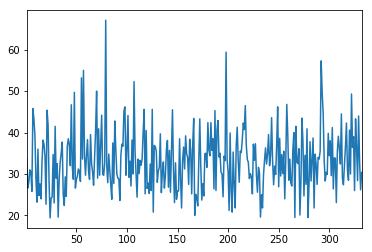

In [79]:
pima.bmi.plot()

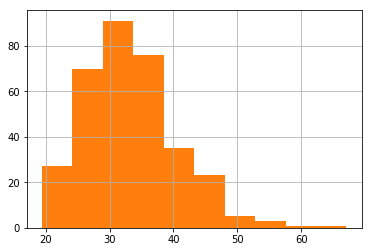

In [35]:
pima['bmi'].hist()
plt.show()

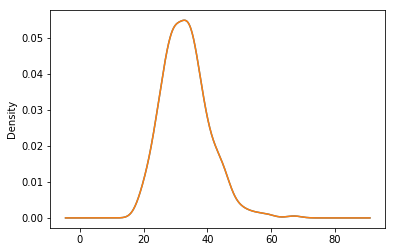

In [37]:
pima['bmi'].plot(kind = 'kde') # kernel density estimation plot
plt.show()

In [72]:
# pima dataframe의 속성 'type'을 기준으로 group화 시키고, yes, no에 대한 평균을 계산
pima.groupby('type').mean()

,npreg,glu,bp,skin,bmi,ped,age
type,,,,,,,
No,2.932735,108.188341,70.130045,27.340807,31.639910,0.464565,29.215247
Yes,4.614679,141.908257,74.770642,32.889908,36.512844,0.658963,35.614679


# .ix

In [66]:
df = pd.DataFrame(np.random.rand(10, 5), columns = ['A', 'B', 'C', 'D', 'E'])
df

,A,B,C,D,E
0,0.128372,0.343289,0.404325,0.068510,0.593595
1,0.611134,0.847905,0.681446,0.235749,0.795597
2,0.435308,0.785805,0.635689,0.319548,0.028547
3,0.208690,0.113016,0.211885,0.386081,0.467654
4,0.125241,0.831596,0.737896,0.911937,0.826579
5,0.622118,0.116611,0.650271,0.362003,0.381360
6,0.498316,0.352616,0.321902,0.426162,0.939045
7,0.944195,0.894185,0.802503,0.870289,0.977573
8,0.366122,0.261100,0.439812,0.007567,0.264296
9,0.067096,0.562827,0.530162,0.126592,0.351396


In [71]:
# .ix로 행과 열을 모두 검색할 수 있다. ix[행번호, 열번호]
df.ix[0, 1:2]

B    0.343289
Name: 0, dtype: float64

In [67]:
# df의 첫번째 행의 모든 열 중에서 0.5보다 작은 것들을 boolean으로 반환
df.ix[0, :] < 0.5

A     True
B     True
C     True
D     True
E    False
Name: 0, dtype: bool

In [68]:
# 첫번째 행의 값이 0.5보다 작은 열들을 모두 출력
df.ix[:, df.ix[0, :] < 0.5]

,A,B,C,D
0,0.128372,0.343289,0.404325,0.068510
1,0.611134,0.847905,0.681446,0.235749
2,0.435308,0.785805,0.635689,0.319548
3,0.208690,0.113016,0.211885,0.386081
4,0.125241,0.831596,0.737896,0.911937
5,0.622118,0.116611,0.650271,0.362003
6,0.498316,0.352616,0.321902,0.426162
7,0.944195,0.894185,0.802503,0.870289
8,0.366122,0.261100,0.439812,0.007567
9,0.067096,0.562827,0.530162,0.126592


In [75]:
grouped_by_type = pima.groupby('type')
grouped_by_type.agg([np.mean, np.std])

npreg                   glu                    bp             \
          mean       std        mean        std       mean        std   
type                                                                    
No    2.932735  2.781852  108.188341  22.645932  70.130045  12.381916   
Yes   4.614679  3.901349  141.908257  32.035727  74.770642  13.128026   

           skin                  bmi                 ped                  age  \
           mean       std       mean       std      mean       std       mean   
type                                                                            
No    27.340807  9.567705  31.639910  6.648015  0.464565  0.315157  29.215247   
Yes   32.889908  9.065951  36.512844  7.457548  0.658963  0.417949  35.614679   

                 
            std  
type             
No    10.131493  
Yes   10.390441

# groupby

In [80]:
df = pd.DataFrame({'key1':['a', 'a', 'b', 'b', 'a'], 'key2':['one', 'two', 'one', 'two', 'one'],
                  'data1':np.random.randn(5),
                  'data2':np.random.randn(5)})
df

,data1,data2,key1,key2
0,1.817329,-0.016933,a,one
1,0.533942,-0.639533,a,two
2,-1.002484,1.648414,b,one
3,0.543996,-0.341813,b,two
4,-0.197518,-0.716697,a,one


In [91]:
grouped1 = df['data1'].groupby(df['key1'])
grouped1.mean()

key1
a    0.717917
b   -0.229244
Name: data1, dtype: float64

In [94]:
grouped2 = df.groupby(df['key1'])
grouped2.agg([np.mean, np.std])

data1               data2          
          mean       std      mean       std
key1                                        
a     0.717917  1.019945 -0.457721  0.383679
b    -0.229244  1.093526  0.653301  1.407303

In [102]:
grouped3 = df['data1'].groupby([df['key1'], df['key2']])
group3_mean = grouped3.mean()
group3_mean

key1  key2
a     one     0.809905
      two     0.533942
b     one    -1.002484
      two     0.543996
Name: data1, dtype: float64

In [104]:
type(group3_mean)

pandas.core.series.Series

In [105]:
# unstack을 하면 기본적으로 index의 가장 최하층이 열로 이동한다
group3_mean.unstack()

key2,one,two
key1,,
a,0.809905,0.533942
b,-1.002484,0.543996


In [106]:
states = np.array(['Ohio', 'California', 'California', 'Ohio', 'Ohio'])
years = np.array([2005, 2005, 2006, 2005, 2006])
df['data1'].groupby([states, years]).mean()

California  2005    0.533942
            2006   -1.002484
Ohio        2005    1.180662
            2006   -0.197518
Name: data1, dtype: float64

In [107]:
df.groupby('key1').mean()

,data1,data2
key1,,
a,0.717917,-0.457721
b,-0.229244,0.653301


In [108]:
df.groupby(['key1', 'key2']).mean()

data1     data2
key1 key2                    
a    one   0.809905 -0.366815
     two   0.533942 -0.639533
b    one  -1.002484  1.648414
     two   0.543996 -0.341813

In [109]:
df.groupby(['key1', 'key2']).size()

key1  key2
a     one     2
      two     1
b     one     1
      two     1
dtype: int64

- apply (row나 column별로 적용) dataframe
- applymap (각각의 원소별로) dataframe
- map Series가 사용됨

# groupby 2

In [110]:
def peak_to_peak(arr):
    return arr.max() - arr.min()

In [2]:
df = pd.DataFrame({'key1':['a', 'a', 'b', 'b', 'a'], 'key2':['one', 'two', 'one', 'two', 'one'],
                  'data1':np.random.randn(5),
                  'data2':np.random.randn(5)})
df

,data1,data2,key1,key2
0,0.914833,-1.424554,a,one
1,-0.738513,0.191174,a,two
2,0.210601,-0.978303,b,one
3,0.136539,0.967734,b,two
4,1.259087,-0.877878,a,one


In [3]:
people = pd.DataFrame(np.random.randn(5, 5),
                     columns = ['a', 'b', 'c', 'd', 'e'],
                     index = ['Joe', 'Steve', 'Wes', 'Jim', 'Travis'])

In [4]:
people.ix[2:3, ['b', 'c']] = np.nan
people

,a,b,c,d,e
Joe,-0.061359,-0.753810,-0.227942,-0.013655,1.530129
Steve,-1.296761,-0.160817,-0.520816,-1.900961,-1.689923
Wes,0.359652,NaN,NaN,-1.192152,-0.377395
Jim,-0.138069,-1.135298,1.264733,1.348008,-0.915452
Travis,-0.074430,1.571596,1.608429,0.432183,-0.376793


In [5]:
k1_means = df.groupby('key1').mean().add_prefix('mean_')
k1_means                                        

,mean_data1,mean_data2
key1,,
a,0.478469,-0.703753
b,0.173570,-0.005284


In [6]:
merg = pd.merge(df, k1_means, left_on = 'key1', right_index = True)
merg

,data1,data2,key1,key2,mean_data1,mean_data2
0,0.914833,-1.424554,a,one,0.478469,-0.703753
1,-0.738513,0.191174,a,two,0.478469,-0.703753
4,1.259087,-0.877878,a,one,0.478469,-0.703753
2,0.210601,-0.978303,b,one,0.173570,-0.005284
3,0.136539,0.967734,b,two,0.173570,-0.005284


In [24]:
pd.concat([df, k1_means])

,data1,data2,key1,key2,mean_data1,mean_data2
0,0.914833,-1.424554,a,one,NaN,NaN
1,-0.738513,0.191174,a,two,NaN,NaN
2,0.210601,-0.978303,b,one,NaN,NaN
3,0.136539,0.967734,b,two,NaN,NaN
4,1.259087,-0.877878,a,one,NaN,NaN
a,NaN,NaN,NaN,NaN,0.478469,-0.703753
b,NaN,NaN,NaN,NaN,0.173570,-0.005284


In [118]:
key = ['one', 'two', 'one', 'two', 'one']
mean_people = people.groupby(key).mean()
mean_people

,a,b,c,d,e
one,0.764415,0.100860,0.515082,0.101761,1.097660
two,-0.588465,0.715386,-0.113634,-0.056784,-0.344479


In [119]:
# 매개변수 key는 index에 매칭이 된다.
# transform을 하면 'one', 'two'로 묶였던 index들이 원래 index로 바뀌지만, 값들은 np.mean을 가지게 됨
mean_people2 = people.groupby(key).transform(np.mean)
mean_people2

,a,b,c,d,e
Joe,0.764415,0.100860,0.515082,0.101761,1.097660
Steve,-0.588465,0.715386,-0.113634,-0.056784,-0.344479
Wes,0.764415,0.100860,0.515082,0.101761,1.097660
Jim,-0.588465,0.715386,-0.113634,-0.056784,-0.344479
Travis,0.764415,0.100860,0.515082,0.101761,1.097660


In [133]:
def demean(arr):
    return arr - arr.mean()

In [134]:
demeaned = people.groupby(key).transform(demean)
demeaned

,a,b,c,d,e
Joe,-0.465778,-0.963909,-1.099095,1.458036,-0.424150
Steve,0.095656,-0.945064,-0.836629,0.026667,-0.175689
Wes,1.841496,1.535998,0.955081,0.315896,1.692371
Jim,-0.095656,0.945064,0.836629,-0.026667,0.175689
Travis,-1.375718,-0.572089,0.144014,-1.773932,-1.268221


In [123]:
np.round(demeaned.describe(), 2)

,a,b,c,d,e
count,5.00,5.00,5.00,5.00,5.00
mean,0.00,-0.00,0.00,-0.00,0.00
std,1.17,1.16,0.94,1.16,1.09
min,-1.38,-0.96,-1.10,-1.77,-1.27
25%,-0.47,-0.95,-0.84,-0.03,-0.42
50%,-0.10,-0.57,0.14,0.03,-0.18
75%,0.10,0.95,0.84,0.32,0.18
max,1.84,1.54,0.96,1.46,1.69


# split

In [10]:
val = 'a, b,    guide'
val.split(',')

['a', ' b', '    guide']

In [11]:
pieces = [x.strip() for x in val.split(',')]
pieces

['a', 'b', 'guide']

In [13]:
first, second, third = pieces
print first+'::'+second+'::'+third

a::b::guide


In [16]:
'::'.join([first, second, third])

'a::b::guide'

# datetime

In [17]:
from datetime import datetime

In [19]:
now = datetime.now()
print now, now.year, now.month, now.day

2017-02-28 11:16:36.449831 2017 2 28


In [20]:
delta = datetime(2015, 1, 7) - datetime(2010, 6, 24, 8 ,15)
print delta, delta.days, delta.seconds

1657 days, 15:45:00 1657 56700


In [21]:
from datetime import timedelta

In [22]:
start = datetime(2015, 1, 7)
print start, timedelta(12)

2015-01-07 00:00:00 12 days, 0:00:00


In [23]:
print start - 2 * timedelta(12)

2014-12-14 00:00:00


# 정규표현식

In [26]:
import re

In [30]:
text = '''aaa@naver.com
bbb@naver.com
ccc@naver.com
ddd@naver.com'''

In [28]:
pattern = r'[A-Z0-9._%+-]+@[A-Z0-9.-]+\.[A-Z]{2,4}'
regex = re.compile(pattern, flags = re.IGNORECASE)
regex.findall(text)

['aaa@naver.com', 'bbb@naver.com', 'ccc@naver.com', 'ddd@naver.com']

In [31]:
re.split('\s+', text)

['aaa@naver.com', 'bbb@naver.com', 'ccc@naver.com', 'ddd@naver.com']

In [35]:
regex = re.compile('\s+')
regex.split(text)

['aaa@naver.com', 'bbb@naver.com', 'ccc@naver.com', 'ddd@naver.com']

In [33]:
regex.findall(text)

['\n', '\n', '\n']

In [36]:
m = regex.search(text)
text[m.start():m.end()]

'\n'

In [37]:
regex.match(text)

In [38]:
regex.sub('redacted', text)

'aaa@naver.comredactedbbb@naver.comredactedccc@naver.comredactedddd@naver.com'

In [39]:
pattern = r'([A-Z0-9._%+-]+)@([A-Z0-9.-]+)\.([A-Z]{2,4})'
regex = re.compile(pattern, flags = re.IGNORECASE)
m = regex.match('wes@bright.net')
regex.findall(text)

[('aaa', 'naver', 'com'),
 ('bbb', 'naver', 'com'),
 ('ccc', 'naver', 'com'),
 ('ddd', 'naver', 'com')]

# date

In [36]:
import datetime
import pandas as pd
import numpy as np

In [3]:
stamp = datetime.datetime(2015, 1, 17)
str(stamp)

'2015-01-17 00:00:00'

In [4]:
stamp.strftime('%Y-%m-%d')

'2015-01-17'

In [28]:
value = '2015-01-04'
print datetime.datetime.strptime(value, '%Y-%m-%d')

2015-01-04 00:00:00


In [31]:
datestrs = ['2015-07-06', '2015-08-06']
[datetime.datetime.strptime(x, '%Y-%m-%d') for x in datestrs]

[datetime.datetime(2015, 7, 6, 0, 0), datetime.datetime(2015, 8, 6, 0, 0)]

In [33]:
df = pd.DataFrame({'year':[2015, 2016], 'month':[2, 3], 'day':[4, 5]})
pd.to_datetime(datestrs)

DatetimeIndex(['2015-07-06', '2015-08-06'], dtype='datetime64[ns]', freq=None)

In [18]:
idx = pd.to_datetime(datestrs)
idx

DatetimeIndex(['2015-07-06', '2015-08-06'], dtype='datetime64[ns]', freq=None)

In [19]:
pd.isnull(idx)

array([False, False], dtype=bool)

In [20]:
from dateutil.parser import parse

In [22]:
print parse('2015-01-03')

2015-01-03 00:00:00


In [23]:
print parse('Jan 31, 1997 10:45 PM')

1997-01-31 22:45:00


In [24]:
print parse('6/12/2015', dayfirst = True)

2015-12-06 00:00:00


In [34]:
print pd.to_datetime('20150107')

2015-01-07 00:00:00


In [41]:
dates = [datetime.datetime(2015, 1, 2), datetime.datetime(2015, 1, 5),
        datetime.datetime(2015, 1, 7), datetime.datetime(2015, 1, 9),
         datetime.datetime(2015, 1, 11), datetime.datetime(2015, 1, 13)]
ts = pd.Series(np.random.randn(6), index = dates)
ts

2015-01-02    0.009807
2015-01-05    0.967336
2015-01-07    0.817106
2015-01-09   -1.379073
2015-01-11    0.105543
2015-01-13   -0.449595
dtype: float64

In [49]:
# 해당 날짜가 없어도 해당 날짜와 가장 가까운 다음 날짜를 선택하여 찾는다
ts['1/6/2015':'1/11/2015']

2015-01-07    0.817106
2015-01-09   -1.379073
2015-01-11    0.105543
dtype: float64

In [44]:
ts[datetime.datetime(2015, 1, 7)]

0.81710645466992027

In [50]:
stamp = ts.index[2]
ts[stamp], ts['1/7/2015'], ts['20150107']

(0.81710645466992027, 0.81710645466992027, 0.81710645466992027)

In [47]:
longer_ts = pd.Series(np.random.randn(1000), 
                      index = pd.date_range('1/1/2015', periods = 1000))
print longer_ts.head()

2015-01-01   -0.506776
2015-01-02   -0.299736
2015-01-03    0.222200
2015-01-04   -1.839930
2015-01-05    1.210227
Freq: D, dtype: float64


In [48]:
longer_ts['2015/12/1'], longer_ts['2015-05-15']

(0.11616959219590568, -1.7616264224953582)

# downsampling

In [51]:
# 분단위로 보여줌 
rng = pd.date_range('1/1/2014', periods = 12, freq = 'T')
ts = pd.Series(np.arange(12), index = rng)
ts

2014-01-01 00:00:00     0
2014-01-01 00:01:00     1
2014-01-01 00:02:00     2
2014-01-01 00:03:00     3
2014-01-01 00:04:00     4
2014-01-01 00:05:00     5
2014-01-01 00:06:00     6
2014-01-01 00:07:00     7
2014-01-01 00:08:00     8
2014-01-01 00:09:00     9
2014-01-01 00:10:00    10
2014-01-01 00:11:00    11
Freq: T, dtype: int64

In [56]:
ts.resample('5min').OHLC()

AttributeError: 'Series' object has no attribute 'OHLC'

In [62]:
# 100일치를 보여줌
rng = pd.date_range('1/1/2014', periods = 100, freq = 'D')
ts = pd.Series(np.arange(100), index = rng)
ts.head()

2014-01-01    0
2014-01-02    1
2014-01-03    2
2014-01-04    3
2014-01-05    4
Freq: D, dtype: int64

In [68]:
ts.index

DatetimeIndex(['2014-01-01', '2014-01-02', '2014-01-03', '2014-01-04',
               '2014-01-05', '2014-01-06', '2014-01-07', '2014-01-08',
               '2014-01-09', '2014-01-10', '2014-01-11', '2014-01-12',
               '2014-01-13', '2014-01-14', '2014-01-15', '2014-01-16',
               '2014-01-17', '2014-01-18', '2014-01-19', '2014-01-20',
               '2014-01-21', '2014-01-22', '2014-01-23', '2014-01-24',
               '2014-01-25', '2014-01-26', '2014-01-27', '2014-01-28',
               '2014-01-29', '2014-01-30', '2014-01-31', '2014-02-01',
               '2014-02-02', '2014-02-03', '2014-02-04', '2014-02-05',
               '2014-02-06', '2014-02-07', '2014-02-08', '2014-02-09',
               '2014-02-10', '2014-02-11', '2014-02-12', '2014-02-13',
               '2014-02-14', '2014-02-15', '2014-02-16', '2014-02-17',
               '2014-02-18', '2014-02-19', '2014-02-20', '2014-02-21',
               '2014-02-22', '2014-02-23', '2014-02-24', '2014-02-25',
      

In [65]:
rng.weekday

array([2, 3, 4, 5, 6, 0, 1, 2, 3, 4, 5, 6, 0, 1, 2, 3, 4, 5, 6, 0, 1, 2, 3,
       4, 5, 6, 0, 1, 2, 3, 4, 5, 6, 0, 1, 2, 3, 4, 5, 6, 0, 1, 2, 3, 4, 5,
       6, 0, 1, 2, 3, 4, 5, 6, 0, 1, 2, 3, 4, 5, 6, 0, 1, 2, 3, 4, 5, 6, 0,
       1, 2, 3, 4, 5, 6, 0, 1, 2, 3, 4, 5, 6, 0, 1, 2, 3, 4, 5, 6, 0, 1, 2,
       3, 4, 5, 6, 0, 1, 2, 3], dtype=int32)

In [59]:
ts.groupby(lambda x : x.month).mean()

1    15.0
2    44.5
3    74.0
4    94.5
dtype: float64

In [61]:
ts.groupby(lambda x : x.weekday).mean()

0    50.5
1    51.5
2    49.0
3    50.0
4    47.5
5    48.5
6    49.5
dtype: float64

# stock data

In [99]:
close_px_all = pd.read_csv('stock_px.csv', parse_dates = True)

close_px = close_px_all[['Unnamed: 0', 'AAPL', 'MSFT', 'XOM']]
# Unnamed: 0을 index로 변경
close_px = close_px.set_index('Unnamed: 0')

# unnamed: 0 이름 변경
close_px.index.names = ['date']
close_px.head()

# 컬럼명 변경시
#close_px_all.rename(column = {'Unnamed: 0':'date'})

,AAPL,MSFT,XOM
date,,,
2003-01-02 00:00:00,7.40,21.11,29.22
2003-01-03 00:00:00,7.45,21.14,29.24
2003-01-06 00:00:00,7.45,21.52,29.96
2003-01-07 00:00:00,7.43,21.93,28.95
2003-01-08 00:00:00,7.28,21.31,28.83


In [100]:
type(close_px)

pandas.core.frame.DataFrame

In [103]:
close_px = close_px.resample('B').ffill()
#close_px = close_px.resample('B', fill_method = 'ffill')

TypeError: Only valid with DatetimeIndex, TimedeltaIndex or PeriodIndex

In [105]:
close_px['AAPL'].plot()
close_px['AAPL'].ix['01-2011':'03-2011'].plot()
#appl_q = close_px['AAPL'].resample('Q-DEC').ffill()

TypeError: Empty 'DataFrame': no numeric data to plot